In [20]:
import os
import numpy as np
import pandas as pd
import re

In [29]:
dir_path = './'
results = []
dataset_names = []
dirs_multiple_seeds = [
#     os.path.join(dir_path, "results_benchmark_fed_camelyon16"),
#     os.path.join(dir_path, "results_benchmark_fed_lidc_idri"),
    os.path.join(dir_path, "results_benchmark_fed_ixi"),
#     os.path.join(dir_path, "results_benchmark_fed_tcga_brca"),
#     os.path.join(dir_path, "results_benchmark_fed_kits19"),
#     os.path.join(dir_path, "results_benchmark_fed_isic2019"),
#     os.path.join(dir_path, "results_benchmark_fed_heart_disease"),
#     os.path.join(dir_path, "results_benchmark_fed_covid19"),
]
for dir in dirs_multiple_seeds:
    csv_files = [os.path.join(dir, f) for f in os.listdir(dir)]
    result_pds = [pd.read_csv(f) for f in csv_files]
    df = pd.concat(result_pds, ignore_index=True)
    results.append(df)
    dataset_names.append("_".join(dir.split("/")[-1].split(".")[0].split("_")[2:]))

In [30]:
res = results[0]
res = res.loc[res["Test"] != "Pooled Test"]
strategies_names = [
    "FedAvg",
    "Scaffold",
    "FedProx",
    "Cyclic",
    "FedAdagrad",
    "FedYogi",
    "FedAdam",
#     "FedAvgFineTuning"
]
# Filtering only 100 updates strategies
strategies = [strat + str(100) for strat in strategies_names]
current_methods = (
        ["Pooled Training"]
        + ["Local " + str(i) for i in range(6)]
        + strategies
    )
res = res.loc[res["Method"].isin(current_methods)]
res = res.rename(columns={"Method": "Training Method"})
res.loc[res["Training Method"] == "Pooled Training", "Training Method"] = "Pooled"
    
res["Training Method"] = [
        re.sub("Local", "Client", m) for m in res["Training Method"].tolist()
    ]

In [31]:
res

,Training Method,Test,tau,learning_rate,beta1,Metric,beta2,mu,server_learning_rate,seed,optimizer_class
0,Pooled,client_test_0,NaN,0.0010,NaN,0.987260,NaN,NaN,NaN,44,<class 'torch.optim.adamw.AdamW'>
1,Pooled,client_test_1,NaN,0.0010,NaN,0.988020,NaN,NaN,NaN,44,<class 'torch.optim.adamw.AdamW'>
2,Pooled,client_test_2,NaN,0.0010,NaN,0.985726,NaN,NaN,NaN,44,<class 'torch.optim.adamw.AdamW'>
4,Client 0,client_test_0,NaN,0.0010,NaN,0.985868,NaN,NaN,NaN,44,<class 'torch.optim.adamw.AdamW'>
5,Client 0,client_test_1,NaN,0.0010,NaN,0.980851,NaN,NaN,NaN,44,<class 'torch.optim.adamw.AdamW'>
...,...,...,...,...,...,...,...,...,...,...,...
213,FedYogi100,client_test_1,1.000000e-08,0.0001,0.9,0.343290,0.999,NaN,0.1,42,<class 'torch.optim.sgd.SGD'>
214,FedYogi100,client_test_2,1.000000e-08,0.0001,0.9,0.335512,0.999,NaN,0.1,42,<class 'torch.optim.sgd.SGD'>
216,Scaffold100,client_test_0,NaN,0.0010,NaN,0.795570,NaN,NaN,1.0,42,<class 'torch.optim.sgd.SGD'>
217,Scaffold100,client_test_1,NaN,0.0010,NaN,0.787719,NaN,NaN,1.0,42,<class 'torch.optim.sgd.SGD'>


In [32]:
res.groupby('Training Method')['Metric'].mean()

Training Method
Client 0         0.982217
Client 1         0.971800
Client 2         0.956363
Cyclic100        0.484797
FedAdagrad100    0.687421
FedAdam100       0.416852
FedAvg100        0.772379
FedProx100       0.771970
FedYogi100       0.418932
Pooled           0.986753
Scaffold100      0.773840
Name: Metric, dtype: float64

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Training Method'>

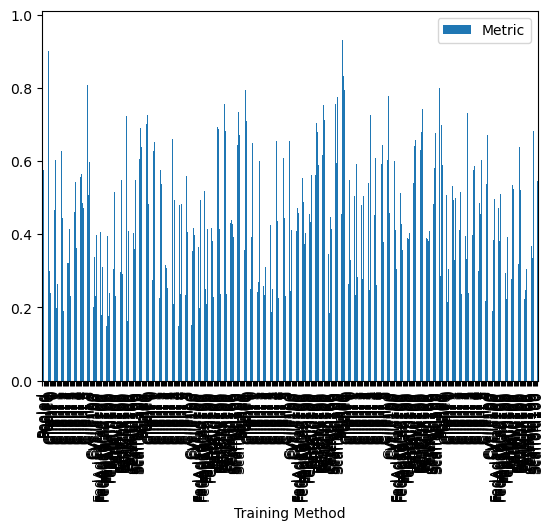

In [23]:
res.plot.bar(x='Training Method',y='Metric')